# 머신러닝 지도학습 회귀모델 실습 
- Kaggle data : https://www.kaggle.com/mustafaali96/weight-height
- 데이터 컬럼 : Gender, Height, Weight
- 목표(target) : 사람의 키에 따른 몸무게 예측하기
- 학습기(Estimator) : LinearRegression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 데이터 로딩 및 단위 변경 

In [2]:
data = "data/weight-height.csv" 
wh_df = pd.read_csv(data)

In [3]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


## [문제해결] 컬럼 단위를 우리에게 익숙한 값으로 변경하기
- 키 : inch -> cm, 1inch = 2.54cm
- 몸무게 : lb(파운트) -> kg, 1lb = 0.4563kg

In [5]:
wh_df.head

<bound method NDFrame.head of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

In [6]:
wh_df['Height'] = wh_df['Height'] * 2.54

In [7]:
wh_df['Weight'] = wh_df['Weight']* 0.4563

In [8]:
wh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [9]:
wh_df.shape

(10000, 3)

# EDA 

In [10]:
wh_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


In [11]:
wh_df['Gender'].value_counts()

Gender
Male      5000
Female    5000
Name: count, dtype: int64

In [12]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

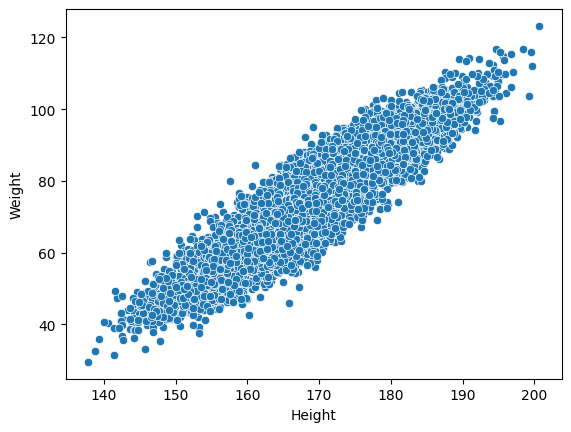

In [13]:
# 키와 몸무게 분포 확인
sns.scatterplot(data=wh_df, x = 'Height', y = 'Weight')
plt.show()

- 문제 : 새로운 키를 입력했을 때, 몸무게를 예측하는 모델을 만들기 

In [14]:
x = wh_df['Height'] # 특징변수 
y = wh_df['Weight'] # 정답, taeget, Lable


In [15]:
x.shape

(10000,)

In [16]:
y.shape

(10000,)

### [문제해결] 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나누기
- random_seed 값 주기
- stratify=y 설정은
  - target이 classification인 경우
  - feature가 2개이상 있을 때 사용

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [18]:
x_train.shape, y_train.shape

((8000,), (8000,))

# 회귀 모델 학습 

In [19]:
model_lr = LinearRegression()

In [20]:
model_lr.fit(x_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

- 독립변수가 한개여도 독립변수는 2d(2차원)으로 만들어서 학습해야함.

In [21]:
# x_train -> 2d
x_train.values.reshape(-1,1)

array([[158.38424815],
       [150.90929264],
       [163.96639183],
       ...,
       [172.08583788],
       [167.17562084],
       [174.96463993]])

In [22]:
# x_test -> 2d
x_test.values.reshape(-1,1)

array([[173.53649028],
       [164.22298414],
       [188.04787828],
       ...,
       [171.59270539],
       [162.35978704],
       [158.54282215]])

In [23]:
model_lr.fit(x_train.to_frame(), y_train)

LinearRegression()

In [24]:
y_pred = model_lr.predict(x_test.values.reshape(-1,1))

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
y_pred = model_lr.predict(x_test.to_frame())

In [26]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 예측값(y_pred)와 실제값(y_test)이 있다고 가정
# y_test : 정답값
# y_pred : 예측값

# MSE 계산
MSE = mean_squared_error(y_test, y_pred)

# RMSE 계산
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)


MSE : 31.729201319729608
RMSE : 5.632867948010996


In [27]:
model_lr.predict([[165]])

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.65250773])

In [28]:
model_lr.predict(np.array([177,185]).reshape(-1,1))

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([85.29030521, 96.3821702 ])

In [32]:
my_height1 = pd.Series(172)
type(my_height1)
my_height1.values.reshape(-1,1)

array([[172]])

In [33]:
import pandas as pd

# 괄호를 제대로 닫고, columns를 DataFrame 함수 안에 넣어야 합니다.
my_data = pd.DataFrame([165], columns=["Height"])

# 출력
my_data


,Height
0,165


In [34]:
model_lr.predict(my_data)

array([68.65250773])

In [35]:
# 4명의 데이터 
# [165, 174, 180, 163] -> [[165],[174],[180],[163]]
model_lr.predict([[165],[174],[180],[163]])

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.65250773, 81.13085584, 89.44975458, 65.87954148])

In [38]:
x_test[:5]

937     173.536490
9355    164.222984
2293    188.047878
192     177.111164
8675    164.033023
Name: Height, dtype: float64

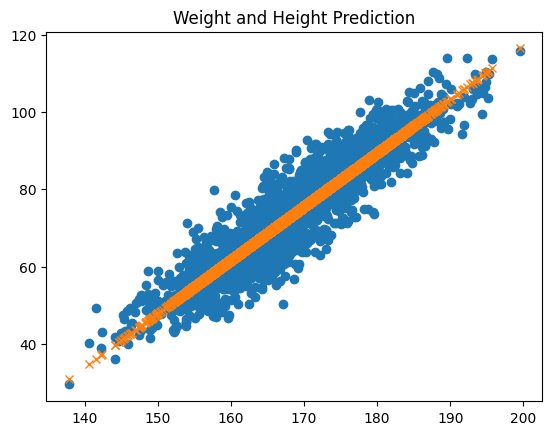

In [44]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred, 'x')
plt.title('Weight and Height Prediction')
plt.show()

# 키와 성별에 따른 몸무게 예측하기 

In [45]:
# read weight-height dataset
data = "data/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [46]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


<Figure size 1000x600 with 0 Axes>

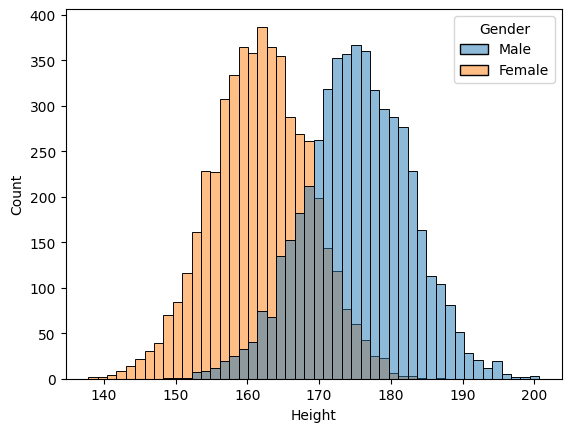

<Figure size 1000x600 with 0 Axes>

In [47]:
# feature distribution
sns.histplot(data=gwh_df, x="Height", hue="Gender")
plt.figure(figsize=(10,6))

## ML을 위한 feature Engineering
- 범주형 데이터 숫자로 변환 : One Hot Encoding

In [48]:
# Gender 컬럼을 one hot encoding으로 변환하기
df_ohe = pd.get_dummies(gwh_df , columns= ['Gender'])
df_ohe

,Height,Weight,Gender_Female,Gender_Male
0,187.571423,110.376033,False,True
1,174.706036,74.062269,False,True
2,188.239668,97.073652,False,True
3,182.196685,100.405379,False,True
4,177.499761,94.157414,False,True
...,...,...,...,...
9995,168.078536,62.411552,True,False
9996,170.350573,77.967025,True,False
9997,162.224700,58.623288,True,False
9998,175.346978,74.765878,True,False


## 학습, 테스트 데이터 준비 

In [50]:
# X = Gender, Height
X = df_ohe.drop(columns='Weight')

# y = Weight
y = df_ohe['Weight']

In [51]:
X.head()

,Height,Gender_Female,Gender_Male
0,187.571423,False,True
1,174.706036,False,True
2,188.239668,False,True
3,182.196685,False,True
4,177.499761,False,True


In [52]:
# train data / test 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
X_train

,Height,Gender_Female,Gender_Male
9254,155.934775,True,False
1561,189.731998,False,True
1670,174.009850,False,True
6087,167.125690,True,False
6669,170.590986,True,False
...,...,...,...
5734,160.908969,True,False
5191,149.508528,True,False
5390,163.386531,True,False
860,175.449210,False,True


In [54]:
# 학습모델 객체생성, 학습, 테스트
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

LinearRegression()

## 테스트 및 성능 평가 

In [55]:
y_pred = model_lr2.predict(X_test)
y_pred

array([75.55642225, 84.77185534, 78.14549722, ..., 57.84501902,
       79.97209066, 48.15240468])

In [56]:
X_test.columns

Index(['Height', 'Gender_Female', 'Gender_Male'], dtype='object')

## [문제해결] MSE, RMSE 구하기

In [58]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 21.08003941812069
RMSE : 4.591300405998359


In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9033321846361924

## ML 모델 일반화
### [문제해결] 키와, 성별 정보로 일반 데이터를 구성하여 예측하기

In [68]:
import pandas as pd

# my_test 데이터 구성
my_test = pd.DataFrame({
    'Height': [165, 176],
    'Gender_Female': [1, 0],
    'Gender_Male': [0, 1]
})

# 확인
my_test

,Height,Gender_Female,Gender_Male
0,165,1,0
1,176,0,1


In [70]:
model_lr2.predict(my_test)

array([65.39940251, 86.03106994])

In [71]:
X_test[:5]

,Height,Gender_Female,Gender_Male
6252,174.465570,True,False
4684,174.826508,False,True
1731,168.651246,False,True
4742,182.700524,False,True
4521,170.288974,False,True


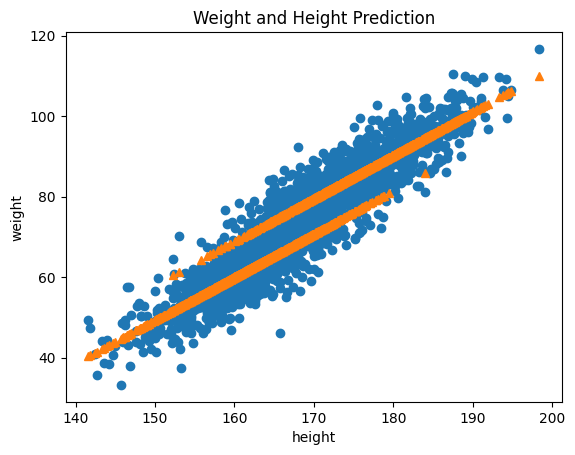

In [72]:
# 테스트 데이터(X)에 따른 실제 몸무게(y)와 예측 데이터(y^) 그래프 그리기
plt.plot(X_test.loc[:,'Height'], y_test, 'o')  # 실제값 표시
plt.plot(X_test.loc[:,'Height'], y_pred, '^')  # 예측값 표시
plt.title('Weight and Height Prediction')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()